## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. **Nota: Se considera un nivel de precisión del 91% como buen desempeño para este laboratorio**. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras
import keras

from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [2]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
# Cargar datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalización (0-1)
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# División entrenamiento/validación (80/20)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Ajustamos las dimensiones de los datos para que puedan ser trabajadas por las funciones de keras.
image_rows = X_train.shape[1]
image_cols = X_train.shape[2]
X_train = X_train.reshape(-1,image_rows,image_cols, 1)
X_test = X_test.reshape(-1,image_rows,image_cols, 1)
X_train.shape, X_test.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

In [3]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses, "\n")
print('Clases/labels: ', classes, " \n")

print("Label 	Description \n"+
"0 	T-shirt/top \n"+
"1 	Trouser \n"+
"2 	Pullover \n"+
"3 	Dress \n"+
"4 	Coat \n"+
"5 	Sandal \n"+
"6 	Shirt \n"+
"7 	Sneaker \n"+
"8 	Bag \n"+
"9 	Ankle boo")

Número total de clases:  10 

Clases/labels:  [0 1 2 3 4 5 6 7 8 9]  

Label 	Description 
0 	T-shirt/top 
1 	Trouser 
2 	Pullover 
3 	Dress 
4 	Coat 
5 	Sandal 
6 	Shirt 
7 	Sneaker 
8 	Bag 
9 	Ankle boo


Text(0.5, 1.0, 'Label : 7')

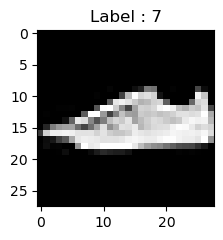

In [4]:
plt.figure(figsize=[5,5])
# Visualiza la primera imagen en la base de training
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_train[0]))

Se realiza la importacion del data set atraves de la libreria de keras, este data set se compone de 2 listas con dos elementos los cuales contienen los set de train y test ya separados por variables predictoras y objetivo.

se realiza la normalizacion de los set's para que los valores queden entre 0-1.
se realiza el split de el set train para validacion y entrenamiento.
se realiza el ajuste de los set's para funcionar con las funciones de keras.

Ademas se implementa un visulizacion de las clases objetivo y se muestra una de las imagenes del set de train.

Se evidencian 10 posibles clases para las imagenes del set las cuales se normalizan y ajustan para facilitar el procesamiento de estas para el modelo.

### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

In [5]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

# Definicion de modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_rows,image_cols,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))               
model.add(Dense(nClasses, activation='softmax'))

# Compilacion del modelo - 0.9150
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
750/750 [==============================] - 52s 68ms/step - loss: 0.6227 - accuracy: 0.7741 - val_loss: 0.3720 - val_accuracy: 0.8627
Epoch 2/10
750/750 [==============================] - 50s 66ms/step - loss: 0.3998 - accuracy: 0.8536 - val_loss: 0.3188 - val_accuracy: 0.8808
Epoch 3/10
750/750 [==============================] - 49s 66ms/step - loss: 0.3438 - accuracy: 0.8759 - val_loss: 0.2931 - val_accuracy: 0.8885
Epoch 4/10
750/750 [==============================] - 49s 65ms/step - loss: 0.3045 - accuracy: 0.8914 - val_loss: 0.2691 - val_accuracy: 0.8967
Epoch 5/10
750/750 [==============================] - 49s 66ms/step - loss: 0.2816 - accuracy: 0.8975 - val_loss: 0.2561 - val_accuracy: 0.9041
Epoch 6/10
750/750 [==============================] - 49s 66ms/step - loss: 0.2631 - accuracy: 0.9045 - val_loss: 0.2397 - val_accuracy: 0.9091
Epoch 7/10
750/750 [==============================] - 49s 65ms/step - loss: 0.2428 - accuracy: 0.9110 - val_loss: 0.2327 - val_accuracy:

Se establece un modelo de red neuronal convolucional la cual consta de 2 capas convolucionales de 32 y 64 filtros 3x3 confuncion de activacion relu. ademas de 2 capas de MaxPooling las cuales ayudan a extraer las caracteristicas mas relevantes y reduce el costo computacional al hacer una reduccion de tamaño. Se implementan 3 capas ocultas de procesamiento dense, una capa dropOut y una capa flatten.

la funcion de perdida es sparse_categorical_crossentropy la cual nos permite tener los labels numericos sin transformalos en arrays binarios, optimizador adam el cual es util para modelos donde vamos a estar tuneando mucho los hiperparametros y metica accuracy ya que es nuestro objetivo a maximizar.

se entrenara en 10 epocas con un bath de 64.

el modelo se entrena en las 10 epocas llegando a una funcion de perdida de 0.2071 y un accuracy en entramiento  de 92.34%


### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

In [6]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {test_acc:.4f}")

Precisión en test: 0.9136


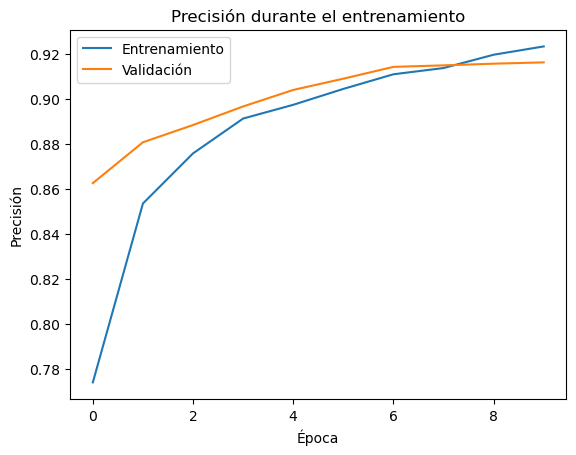

In [7]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

El modelo presenta una precision de 91.36% en la evaluacion de desempeño la cual se realiza con el set de prueba separado por el data set directamente.

El tiempo de ejecucion del modelo es relativamente de rapido debido a que no es una red muy profunda ya que la cantidad de capas es adecuada a la complejidad del data set y se utiliza una cantidad moderada de neuronas por capa.

el modelo esta montado primero con las capas convolucionales y de extraccion de rasgos las cuales toman la informacion y extraen los parametros principales. luego tenemos las capas de adaptacion y de procesamiento acompañadas de una seccion de drop out lo cual permite que no se memorizen los datos y genere sobre entrenamiento.

el modelo es simple y adecuado al set de datos para ejecutar en un tiempo reducido y genere la precision solicitada por el problema.